In [1]:
import pandas as pd
import numpy as np
import math
import random
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import datetime

In [2]:
filename = "sap_storing_data_hu_project.csv" 
n = sum(1 for line in open(filename, encoding='utf8'))-1  
s = n//10
skip = sorted(random.sample(range(1, n+1), n-s))
df_not_cleaned = pd.read_csv(filename, skiprows=skip)
#verwijder alle kolommen die niet van gebruik zijn:
df = df_not_cleaned.drop(columns=['stm_sap_mon_meld_ddt', 'stm_mon_begin_ddt', 'stm_mon_toelichting_trdl', 'stm_oh_pg_mld', 'stm_geo_mld_uit_functiepl', 'stm_scenario_mon', 'stm_status_melding_sap', 'stm_mon_nr_status_omschr', 'stm_mon_nr__statuscode', 'stm_mon_nr_status_wijzdd', 'stm_aanntpl_ddt', 'stm_geo_gst_uit_functiepl', 'stm_objectdl_code_gst', 'stm_objectdl_groep_gst', 'stm_progfh_in_ddt', 'stm_progfh_in_invoer_ddt', 'stm_progfh_gw_ddt', 'stm_progfh_gw_lwd_ddt', 'stm_progfh_hz', 'stm_veroorz_groep', 'stm_veroorz_code', 'stm_progfh_gw_duur', 'stm_progfh_gw_lwd_tijd', 'stm_progfh_gw_lwd_datum', 'stm_progfh_gw_datum', 'stm_arbeid', 'stm_functiepl_gst', 'stm_functiepl_mld', 'stm_mon_begintijd', 'stm_mon_begindatum', 'stm_aangelegd_tijd', 'stm_aangelegd_dd', 'stm_dir_betrok_tr', 'stm_evb', 'stm_mon_vhdsincident', 'stm_mon_eind_ddt', 'stm_afspr_aanvangddt', 'stm_effect', 'stm_veroorz_tekst_kort', 'stm_projnr', 'stm_wbi_nummer', 'stm_status_gebr', 'stm_standplaats', 'stm_actie', 'stm_hinderwaarde', 'stm_rec_toegev_ddt', 'stm_afsluit_tijd', 'stm_afsluit_dd', 'stm_afsluit_ddt', 'stm_akkoord_melding_jn', 'stm_fact_jn', 'stm_status_sapnaarmon', 'stm_akkoord_mon_toewijz', 'stm_controle_dd', 'stm_mon_eind_tijd', 'stm_mon_eind_datum', 'stm_reactie_duur', 'stm_afspr_aanvangtijd', 'stm_afspr_aanvangdd', 'stm_historie_toelichting', 'stm_schade_verhaalb_jn', 'stm_x_bron_arch_dt', 'stm_x_bron_bestandsnaam', 'stm_x_bron_publ_dt', 'stm_rapportage_jaar', 'stm_rapportage_maand', 'stm_sorteerveld', 'stm_afspr_func_hersteltijd', 'stm_afspr_func_hersteldd', 'stm_relatiervo', 'stm_relatiervo_volgend', 'stm_relatiervo_vorig', 'stm_schade_statusdatum', 'stm_schade_status_ga', 'stm_schadenr', 'stm_x_start_sessie_dt', 'stm_x_bk', 'stm_x_run_id', 'stm_x_actueel_ind', 'stm_x_vervallen_ind'])
print("Done")

c:\users\game pc\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,21,25,32,36,37,38,39,40,47,48,55,75,78,80,82,83,86,87,99,102,108,109,110,111,113,116,118,119,120,121,122,124,129) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Done


# Data cleaning:


De te bepalen welke variabelen het meest van toepassing zijn om te gebruiken kijken we naar welke
kolommen informatie geven over de tijd van de melding, monteur. Tijd wanneer de melding word opgelost.
Wat voor melding het is en info over de melding/storing, en de locatie. Zo zijn de volgende kolommen
het meest van toepassing:

Over soort melding
- stm_sap_meldtekst (melding omschrijving)
- stm_geo_mld (melding code) - nodig
- stm_oorz_code (oorzaak code) - nodig
- stm_prioriteit (prioriteit)

Over tijd:
- stm_sap_melddatum (datump melding) - nodig
- stm_sap_meldtijd (tijdstip melding) - nodig
- stm_aanngeb_dd (datum aannemer gebeld)
- stm_aanngeb_tijd (tijd aannemer gebeld)
- stm_aanntpl_dd (datum aannemer op plek)
- stm_aanntpl_tijd (tijd aannemer op plek)

- stm_fh_dd (Datum van functie herstel) - nodig
- stm_fh_tijd (Tijdstip van functieherstel) - nodig
- stm_sap_storeinddatum (Datum einde storing) - nodig
- stm_sap_storeindtijd (Tijdstip einde storing) - nodig
- stm_fh_duur (Duur van functiehersteltijd) - nodig

Over equipment:
- stm_equipm_nr_mld (equipment)
- stm_equipm_omschr_mld (equipment omschrijving)

Over locatie
- stm_km_van_mld (locatie van)
- stm_km_tot_mld (locatie tot)
- stm_vl_post (VL post) - nodig
- stm_contractgeb_mld(locatie melding) - nodig
- stm_pplg_van (PPLG van locatie)
- stm_pplg_naar (PPLG tot locatie)
- stm_dstrglp_van (Dienstregelpunt van locatie)
- stm_dstrglp_naar (Dienstregelpunt tot locatie)

Over prognose:
- stm_progfh_in_datum (Datum prognose)
- stm_progfh_in_tijd (Tijdstip FHT prognose)
- stm_progfh_in_invoer_dat (Invoer datum prognose)
- stm_progfh_in_invoer_tijd (Invoer tijdstip FHT prognose)
- stm_progfh_in_duur (Duur FHT)



In [3]:
#deze functie verwijdert alle rijen waar geen value op de gegeven kolommen zitten
def drop_rows_with_null(lst, df):
    dfisnull = df.isnull()[lst]
    matches = dfisnull[(dfisnull).any(axis=1)]
    return df.drop(matches.index)

In [4]:
#Deze functie berkent de uitschiet grenzen
def uitschieters_bereken(kolom):
    q1 = kolom.quantile(0.25)
    q3 = kolom.quantile(0.75)
    iqr = q3 - q1
    maxuitschieter = q3 + (iqr*1.5)
    minuitschieter = q1 - (iqr*1.5)
    return maxuitschieter, minuitschieter

#Deze functie geeft de indexes van uitschieters in een kolom
def return_uitschieters_indexes(kolom):
    maxuitschieter = uitschieters_bereken(kolom)[0]
    minuitschieter = uitschieters_bereken(kolom)[1]
    uitschieters = [kolom[kolom > maxuitschieter].index, kolom[kolom < minuitschieter].index]
    return uitschieters
    
#Deze functie geeft een kolom zonder uitschieters
def return_kolom_zonder_uitschieters(kolom):
    maxuitschieter = uitschieters_bereken(kolom)[0]
    minuitschieter = uitschieters_bereken(kolom)[1]
    kolom = kolom[kolom < maxuitschieter][kolom > minuitschieter]
    return kolom


In [5]:
#Deze functie berkent de extreme uitschiet grenzen
def ex_uitschieters_bereken(kolom):
    q1 = kolom.quantile(0.25)
    q3 = kolom.quantile(0.75)
    iqr = q3 - q1
    maxuitschieter = q3 + (iqr*3)
    minuitschieter = q1 - (iqr*3)
    return maxuitschieter, minuitschieter

#Deze functie geeft de indexes van extreme uitschieters in een kolom
def return_ex_uitschieters_indexes(kolom):
    maxuitschieter = uitschieters_ex_bereken(kolom)[0]
    minuitschieter = uitschieters_ex_bereken(kolom)[1]
    uitschieters = [kolom[kolom > maxuitschieter].index, kolom[kolom < minuitschieter].index]
    return uitschieters
    
#Deze functie geeft een kolom zonder extreme uitschieters
def return_kolom_zonder_ex_uitschieters(kolom):
    maxuitschieter = uitschieters_ex_bereken(kolom)[0]
    minuitschieter = uitschieters_ex_bereken(kolom)[1]
    kolom = kolom[kolom < maxuitschieter][kolom > minuitschieter]
    return kolom

In [6]:
# Verwijder de rijen die geen value bevatten in de benodigde kolommen
df_filtered = drop_rows_with_null(['stm_geo_mld', 'stm_sap_melddatum', 'stm_oorz_code', 'stm_sap_meldtijd',
                          'stm_fh_dd', 'stm_fh_tijd', 'stm_sap_storeinddatum', 'stm_sap_storeindtijd',
                          'stm_fh_duur', 'stm_vl_post', 'stm_contractgeb_mld'], df)
df_filtered = (df_filtered.loc[(df_filtered['stm_fh_duur'] > 5) & (df_filtered['stm_fh_duur'] < 360)])
df_filtered = (df_filtered[(df_filtered['stm_km_van_mld'] < 500)])
# hoger dan 5 minuten,als het onder de 5 minuten zit is er een goede kans dat het een fout was.
print(len(df))
print(len(df_filtered))
df_filtered

89852
2835


,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_equipm_nr_mld,stm_equipm_soort_mld,...,stm_fh_dd,stm_fh_tijd,stm_fh_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
22,208,50053591,39.0,EHV,20/01/2006 14:32:00,Logboeknr RBV : 39 Tijd: 1432 VL-Post: ...,Logboeknr RBV : 39 Tijd: 1432 VL-P,515.0,10527838.0,WISSEL,...,20/01/2006,14:47:00,15.0,23/01/2006,11:39:00,Geen SMC-melding.,NaN,NaN,Vga,NaN
30,295,50053714,220.0,MT,28/01/2006 22:55:00,Logboeknr RBV : 220 Tijd: 2255 VL-Post: ...,Logboeknr RBV : 220 Tijd: 2255 VL-P,63.0,10621352.0,DETECTREIN,...,28/01/2006,23:10:00,15.0,30/01/2006,09:47:00,Geen SMC-melding.Geen onderzoek geweest.,NaN,NaN,Bde,NaN
36,327,50053757,151.0,EHV,31/01/2006 14:51:00,Logboeknr RBV : 151 Tijd: 1451 VL-Post: ...,Logboeknr RBV : 151 Tijd: 1451 VL-P,53.0,10621339.0,DETECTREIN,...,31/01/2006,15:06:00,15.0,01/02/2006,09:32:00,Geen SMC-melding.,NaN,NaN,Btl,NaN
38,331,50053763,35.0,GN,17/01/2006 14:30:00,Logboeknr RBV : 35 Tijd: 1430 VL-Post: ...,Logboeknr RBV : 35 Tijd: 1430 VL-P,552.0,10201725.0,WISSEL,...,17/01/2006,14:38:00,8.0,17/01/2006,14:38:00,NaN,NaN,NaN,Gnl,NaN
41,360,50053803,10.0,ASD,05/02/2006 04:39:00,Logboeknr RBV : 10 Tijd: 0439 VL-Post: ...,Logboeknr RBV : 10 Tijd: 0439 VL-P,50.0,10284836.0,SEIN,...,05/02/2006,04:48:00,9.0,05/02/2006,04:48:00,Grendel 13 gestoord door werkzaamheden.,NaN,NaN,Asdm,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89725,907519,96000956,620291.0,GN,20/08/2009 19:45:00,Lw.Wsl 157 RL uit controle.,Lw.Wsl 157 RL uit controle.,550.0,10862365.0,WISSCONS,...,20/08/2009,21:23:00,98.0,20/08/2009,21:23:00,Vuil tussen linkertong,LW,NaN,LW,ADH
89742,907692,96001138,1178910.0,ZL,10/06/2011 08:47:00,Zl : tobs in Wl 129B/131A,Zl : tobs in Wl 129B/131A,603.0,10586927.0,WISSEL,...,10/06/2011,09:40:00,48.0,14/06/2011,23:29:00,Gestoord object: SECTIE 129BT. Gestoord,ZL,NaN,ZL,ZLGEA
89744,907708,96001157,1396082.0,ZL,18/02/2012 12:09:00,Rsn : verm.verzakking in wsl 201B,Rsn : verm.verzakking in wsl 201B,24.0,10200760.0,WISSEL,...,18/02/2012,14:00:00,111.0,18/02/2012,14:30:00,bouten los,RSN,NaN,RSN,WDN
89783,908052,98000470,31.0,UT,08/04/2006 10:46:00,HMLa: wsl 1063 RL geen controle Logboeknr RB...,HMLa: wsl 1063 RL geen controle,101.0,10689076.0,WISSEL,...,08/04/2006,13:12:00,145.0,08/04/2006,13:13:00,broken. Eerste prognose was tot 13:00 en,NaN,NaN,HMLA,NaN


In [7]:
#uitgeschreven lijsten zodat ik ze niet steeds hoef over te typen

# melding
df[['stm_sap_meldtekst', 'stm_geo_mld', 'stm_oorz_code', 'stm_prioriteit']]
# tijd
df[['stm_sap_melddatum', 'stm_sap_meldtijd', 'stm_aanngeb_dd', 'stm_aanngeb_tijd', 'stm_aanntpl_dd', 'stm_aanntpl_tijd']]
df[['stm_fh_dd', 'stm_fh_tijd', 'stm_fh_duur', 'stm_sap_storeinddatum', 'stm_sap_storeindtijd']]
# equipment
df[['stm_equipm_omschr_mld', 'stm_equipm_nr_mld']]
# locatie
df[['stm_km_van_mld', 'stm_km_tot_mld', 'stm_vl_post', 'stm_contractgeb_mld', 'stm_pplg_van', 'stm_pplg_naar', 'stm_dstrglp_van', 'stm_dstrglp_naar']]
# prognose
df[['stm_progfh_in_datum', 'stm_progfh_in_tijd', 'stm_progfh_in_invoer_dat', 'stm_progfh_in_invoer_tijd', 'stm_progfh_in_duur']]


,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_in_duur
0,NaN,00:00:00,NaN,00:00:00,1e+08
1,NaN,00:00:00,NaN,00:00:00,1e+08
2,NaN,00:00:00,NaN,00:00:00,1e+08
3,NaN,00:00:00,NaN,00:00:00,1e+08
4,NaN,00:00:00,NaN,00:00:00,1e+08
...,...,...,...,...,...
89847,11/05/2013,00:55:00,11/05/2013,01:00:54,25
89848,NaN,00:00:00,NaN,00:00:00,99999999
89849,NaN,00:00:00,NaN,00:00:00,99999999
89850,NaN,00:00:00,NaN,00:00:00,99999999


# Baseline
Target variabele is 'stm_fh_duur'. Dit is de functie hersteltijd dit houd in dat vanaf de melding tot dat het probleem opgelost is getimed wordt. 

baseline:  

In [8]:
# De target variabele filteren tussen de 0 min en 360 min. Prodcut ower gaf dit als grens aan. 
data_fht = df_filtered['stm_fh_duur'].loc[(df_filtered['stm_fh_duur'] > 0) & (df_filtered['stm_fh_duur'] < 360)]
data_fht

22        15.0
30        15.0
36        15.0
38         8.0
41         9.0
         ...  
89725     98.0
89742     48.0
89744    111.0
89783    145.0
89834    175.0
Name: stm_fh_duur, Length: 2835, dtype: float64

In [9]:
data_fht.describe()

count    2835.000000
mean      107.219048
std        74.431439
min         6.000000
25%        53.500000
50%        90.000000
75%       144.000000
max       359.000000
Name: stm_fh_duur, dtype: float64

In [10]:
data_fht.mean()

107.21904761904761

In [11]:
data_fht.median()

90.0

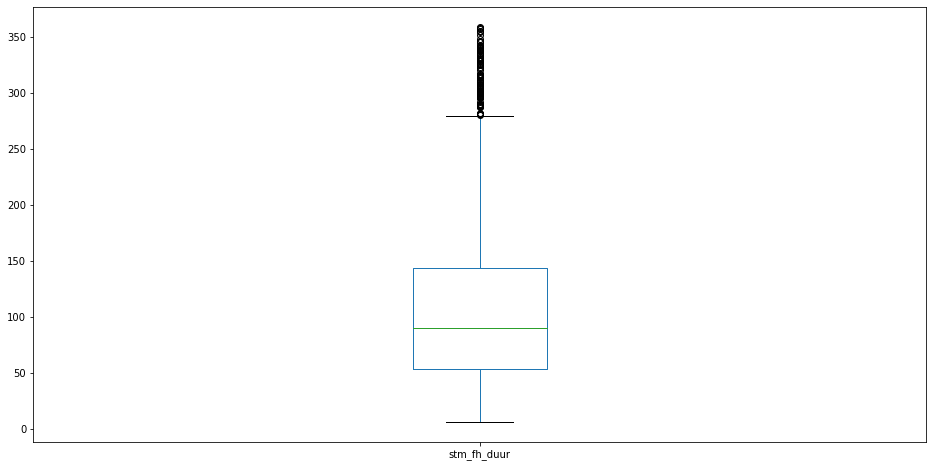

In [12]:
data_fht.plot.box(figsize=(16,8))

In [13]:
len(data_fht[data_fht < data_fht.mean()])

1699

In [14]:
len(data_fht[data_fht < data_fht.mean()])/len(data_fht)*100

59.929453262786595

In [15]:
len(data_fht[data_fht < data_fht.median()])/len(data_fht)*100

49.70017636684304

61% van alle herstel tijden zit onder het gemiddelde 102 min

50% van alle herstel tijden zit onder de mediaan 82 min



In [16]:
data_fht = data_fht.to_frame()
data_fht['mediaan'] = data_fht['stm_fh_duur'].median()
data_fht['mean'] = data_fht['stm_fh_duur'].mean()
data_fht.head()

,stm_fh_duur,mediaan,mean
22,15.0,90.0,107.219048
30,15.0,90.0,107.219048
36,15.0,90.0,107.219048
38,8.0,90.0,107.219048
41,9.0,90.0,107.219048


In [17]:
# de score bepalen aan de hand van de RSME
np.sqrt(mean_squared_error(data_fht.loc[:,'stm_fh_duur'],data_fht.loc[:,'mean']))

74.41831091028764

In [18]:
#de score bepalen aan de hand van de RSME
np.sqrt(mean_squared_error(data_fht.loc[:,'stm_fh_duur'],data_fht.loc[:,'mediaan']))

76.38442642088285

# KNeighborsregression

In [19]:
data_KN = df_filtered[['stm_km_van_mld', 'stm_prioriteit']]

In [20]:
df_filtered['stm_sap_meld_ddt'] = df_filtered['stm_sap_meld_ddt'].apply(pd.to_datetime)

In [21]:
df_year = pd.DataFrame(df_filtered['stm_sap_meld_ddt'].dt.year)
df_filtered.insert(5, 'Jaar', df_year)

In [22]:
df_day = pd.DataFrame(df_filtered['stm_sap_meld_ddt'].dt.dayofyear)
df_filtered.insert(6, 'Dag_van_jaar', df_day)

In [23]:
df_hour = pd.DataFrame(df_filtered['stm_sap_meld_ddt'].dt.hour)
df_filtered.insert(7, 'Uur_van_dag', df_hour)

In [24]:
df_min = pd.DataFrame(df_filtered['stm_sap_meld_ddt'].dt.minute)
df_filtered.insert(8, 'Minuut_van_uur', df_min)

In [25]:
df_hour_min = (df_filtered['Uur_van_dag'] * 60) + df_filtered['Minuut_van_uur']
df_filtered.insert(9, 'Minuut_van_dag', df_hour_min)

In [26]:
X = df_filtered[['stm_km_van_mld', 'stm_prioriteit', 'Dag_van_jaar', 'Jaar', 'Minuut_van_dag']]
y = df_filtered[['stm_fh_duur']]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=None)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

clf

KNeighborsClassifier()

In [29]:
clf.fit(X_train, y_train)

c:\users\game pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier()

In [30]:
y_pred_train = clf.predict(X_train)

y_pred_test = clf.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

print('Accuracy traindata')
print(accuracy_score(y_train, y_pred_train))

print('')
print('Accuracy testdata')
print(accuracy_score(y_test, y_pred_test))

Accuracy traindata
0.25205801646413173

Accuracy testdata
0.04225352112676056


In [32]:
df_filtered['stm_km_van_mld'].describe()

count    2835.000000
mean        5.180247
std        37.954384
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       491.000000
Name: stm_km_van_mld, dtype: float64

# linear regression 

In [33]:
X = df_filtered[['stm_km_van_mld', 'stm_prioriteit', 'Dag_van_jaar', 'Jaar', 'Minuut_van_dag']]
y = df_filtered[['stm_fh_duur']]

In [34]:
# de data splitsen in training en testing data
from sklearn.model_selection import train_test_split
# test_size
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.1, random_state=None) 

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
linear_reg_model = LinearRegression()

In [37]:
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [38]:
from sklearn.metrics import mean_squared_error

y_pred_test = linear_reg_model.predict(X_test)

error_metric = mean_squared_error(y_pred=y_pred_test, y_true=y_test)
print(error_metric)

5703.471802940677


Text(0.5, 1.0, 'voorspelling tegen over daadwerkelijke data')

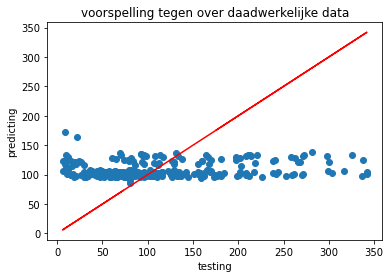

In [39]:
# model plotten en lineare regressie er in verwerken
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test)
ax.plot(y_test, y_test, color='red')
ax.set_xlabel('testing')
ax.set_ylabel('predicting')
ax.set_title('voorspelling tegen over daadwerkelijke data')

In [40]:
from collections import OrderedDict
new_data = OrderedDict([
    ('stm_km_van_mld',50),
    ('stm_prioriteit',5),
    ('Dag_van_jaar',214),
    ('Jaar',2020),
    ('Minuut_van_dag', 800)
])

new_data = pd.Series(new_data).values.reshape(1,-1)

linear_reg_model.predict(new_data)

array([[130.38981085]])

# extra tree classifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

In [42]:
X = df_filtered[['stm_km_van_mld', 'stm_prioriteit', 'Dag_van_jaar', 'Jaar', 'Minuut_van_dag']]
y = df_filtered[['stm_fh_duur']]

In [43]:
# de data splitsen in training en testing data
from sklearn.model_selection import train_test_split
# test_size
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=None) 

In [44]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)

In [45]:
X_test

,stm_km_van_mld,stm_prioriteit,Dag_van_jaar,Jaar,Minuut_van_dag
22874,0.0,2.0,6,2006,646
73392,0.0,2.0,183,2016,1325
32499,0.0,2.0,328,2008,1185
17022,0.0,5.0,323,2017,768
67263,0.0,2.0,351,2014,510
...,...,...,...,...,...
38181,0.0,2.0,155,2010,975
21935,0.0,2.0,58,2006,1190
81668,0.0,5.0,356,2016,1224
34342,0.0,1.0,309,2009,1342


In [46]:
y_test

,stm_fh_duur
22874,12.0
73392,110.0
32499,62.0
17022,77.0
67263,145.0
...,...
38181,216.0
21935,164.0
81668,358.0
34342,315.0


In [47]:
clf.fit(X_train, y_train)

c:\users\game pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


MemoryError: could not allocate 10387456 bytes

In [ ]:
clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix 

In [ ]:
confusion_matrix(list(y_test), clf.predict(X_test))

In [ ]:
accuracy_score(list(y_test), clf.predict(X_test))

In [ ]:
y.shape

In [ ]:
X.shape